In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
filepath = 'dichalcogenides_public/'
im1 = np.load(filepath + 'images/' + '6141d01e31cf3ef3d4a9edf0' + '.npy')

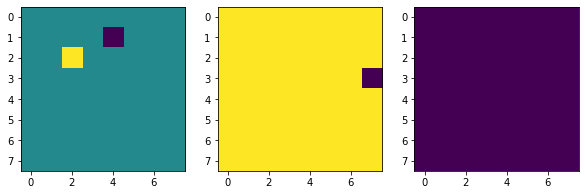

In [42]:
fig, ax = plt.subplots(1,3, figsize=(10,10))

ax[0].imshow(im1[:,:,0])
ax[1].imshow(im1[:,:,1])
ax[2].imshow(im1[:,:,2])

plt.show()

In [43]:
def to_coords(im):
    se = np.argwhere(im==34)
    se = np.hstack((np.repeat([[34]], len(se), axis=0), se))
    coords = se.copy()
    
    w = np.argwhere(im==74)
    w = np.hstack((np.repeat([[74]], len(w), axis=0), w))
    coords = np.vstack((coords,w))
    
    void = np.argwhere(im==0)
    void = np.hstack((np.repeat([[0]], len(void), axis=0), void))
    coords = np.vstack((coords, void))
    return coords

In [44]:
to_coords(im1)

array([[34,  2,  2,  0],
       [ 0,  1,  4,  0],
       [ 0,  3,  7,  1]])

In [45]:
import os

filepath_train = 'dichalcogenides_public/images/'
train_files = os.listdir(filepath_train)

filepath_test = 'dichalcogenides_private/images/'
test_files = os.listdir(filepath_test)

In [52]:
!cd dichalcogenides_public; mkdir coordinates

In [58]:
from tqdm.notebook import tqdm

filepath_save_train = 'dichalcogenides_public/coordinates/'
train_coords = {}
for file in tqdm(train_files):
    img = np.load(filepath_train + file)
    coords = to_coords(img)
    train_coords[file[:-4]] = coords
    np.save(filepath_save_train + file[:-4], coords)

  0%|          | 0/2966 [00:00<?, ?it/s]

In [54]:
!cd dichalcogenides_private; mkdir coordinates

In [59]:
from tqdm.notebook import tqdm

filepath_save_test = 'dichalcogenides_private/coordinates/'
test_coords = {}
for file in tqdm(test_files):
    img = np.load(filepath_test + file[:-4] + '.npy')
    coords = to_coords(img)
    test_coords[file[:-4]] = coords
    np.save(filepath_save_test + file[:-4], coords)

  0%|          | 0/2967 [00:00<?, ?it/s]

In [70]:
num_coords_train = np.array([x.shape[0] for x in train_coords.values()])
num_coords_test = np.array([x.shape[0] for x in test_coords.values()])

In [72]:
num_coords_test.min()

1

In [95]:
df = pd.DataFrame(data=[v.tolist() for v in train_coords.values()], index=train_coords.keys())

In [103]:
df.to_csv('dichalcogenides_public/coordinates_train.csv')

In [104]:
df = pd.DataFrame(data=[v.tolist() for v in test_coords.values()], index=test_coords.keys())

In [108]:
df.to_csv('dichalcogenides_private/coordinates_test.csv')